# Car Prices

🎯 The goal of this challenge is to prepare a dataset and apply some feature selection techniques that you have learned so far.

🚗 We are dealing with a dataset about cars and we would like to predict whether a car is expensive or cheap.

In [1]:
url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset.csv"

❓ Go ahead and load the CSV into a dataframe called `df`

In [2]:
# YOUR CODE HERE
import pandas as pd
import numpy as np

data = pd.read_csv(url)
data

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive
...,...,...,...,...,...,...,...,...,...
200,std,front,68.9,2952,ohc,four,3.15,5400,expensive
201,turbo,front,68.8,3049,ohc,four,3.15,5300,expensive
202,std,front,68.9,3012,ohcv,six,2.87,5500,expensive
203,turbo,front,68.9,3217,ohc,six,3.40,4800,expensive


ℹ️ The description of the dataset is available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset_description.txt). Make sure to refer to it throughout the exercise.

## (1) Duplicates

❓ Remove the duplicates from the dataset if there are any. ❓

*Overwite the dataframe `df`*

In [3]:
# YOUR CODE HERE
data.duplicated().sum()
df = data.drop_duplicates()
df.duplicated().sum()

0

## (2) Missing values

❓ Find the missing values and impute them either with `strategy = "most frequent"` (categorical variables) or `strategy = "median"` (numerical variables) ❓


In [4]:
# YOUR CODE HERE
(df.isnull().sum()/len(data)*100).sort_values(ascending=False)

enginelocation    4.878049
carwidth          0.975610
aspiration        0.000000
curbweight        0.000000
enginetype        0.000000
cylindernumber    0.000000
stroke            0.000000
peakrpm           0.000000
price             0.000000
dtype: float64

### `carwidth`

<details>
    <summary> 💡 Hint </summary>
    <br>
    ℹ️ <code>carwidth</code> has multiple representations for missing values. Some are <code>np.nans</code>, some are  <code>*</code>. Once located, they can be imputed by the median value, since missing values make up less than 30% of the data.
</details> 

In [5]:
# YOUR CODE HERE
from sklearn.impute import SimpleImputer

df.carwidth.replace(['*'], np.nan, inplace=True)
imputer = SimpleImputer(strategy="mean")

imputer.fit(df[['carwidth']])

df['carwidth'] = imputer.transform(df[['carwidth']])

/home/bitazaratustra/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/tmp/ipykernel_9961/2654576364.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['carwidth'] = imputer.transform(df[['carwidth']])


### `enginelocation`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ Considering that <code>enginelocation</code> is a categorical feature, and that the vast majority of the category is <code>front</code>, impute with the most frequent.
</details>

In [6]:
# YOUR CODE HERE
imputer2 = SimpleImputer(strategy = "most_frequent")
imputer2.fit(df[['enginelocation']])

df['enginelocation'] = imputer2.transform(df[['enginelocation']])


/tmp/ipykernel_9961/183368009.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['enginelocation'] = imputer2.transform(df[['enginelocation']])


🧪 **Test your code**

In [7]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = df)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/bitazaratustra/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/bitazaratustra/code/bitazaratustra/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices
plugins: anyio-3.4.0
collecting ... collected 2 items

tests/test_missing_values.py::TestMissing_values::test_carwidth PASSED   [ 50%]
tests/test_missing_values.py::TestMissing_values::test_engine_location PASSED [100%]

============================== 2 passed in 0.48s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master


## (3) Scaling the numerical features

❓ **Question: Scaling the numerical features** ❓

Investigate the numerical features for outliers and distribution, and apply the solutions below accordingly:
- Robust Scaler
- Standard Scaler

Replace the original columns with the transformed values.

### `peakrpm` , `carwidth` , & `stroke`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>peakrpm</code>, <code>carwidth</code>, & <code>stroke</code> have normal distributions and outliers. They must be Robust Scaled.
</details>

<AxesSubplot:>

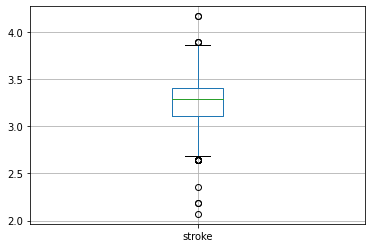

In [8]:
# YOUR CODE HERE
df[['stroke']].boxplot()


<AxesSubplot:>

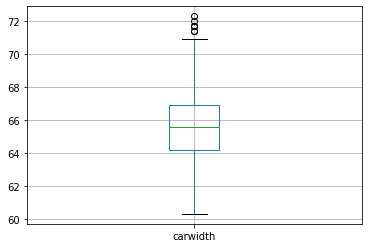

In [9]:
df[['carwidth']].boxplot()

<AxesSubplot:>

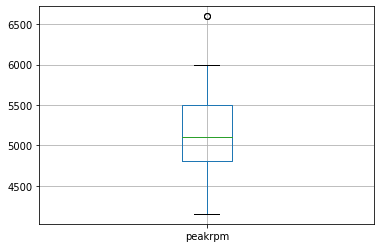

In [10]:
df[['peakrpm']].boxplot()

In [11]:
# YOUR CODE HERE
from sklearn.preprocessing import RobustScaler

r_scaler = RobustScaler()

r_scaler.fit(df[['peakrpm' , 'carwidth' , 'stroke']])

df[['peakrpm' , 'carwidth' , 'stroke']] = r_scaler.transform(df[['peakrpm' , 'carwidth' , 'stroke']])
df.head()

/home/bitazaratustra/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.555556,2548,dohc,four,-2.033333,-0.142857,expensive
2,std,front,-0.037037,2823,ohcv,six,0.600000,-0.142857,expensive
3,std,front,0.139339,2337,ohc,four,0.366667,0.571429,expensive
4,std,front,0.296296,2824,ohc,five,0.366667,0.571429,expensive
5,std,front,0.259259,2507,ohc,five,0.366667,0.571429,expensive


### `curbweight`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>curbweight</code> has a normal distribution and no outliers. It can be Standard Scaled.
</details>

In [12]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df[['curbweight']])

df['curbweight'] = scaler.transform(df[['curbweight']])

/tmp/ipykernel_9961/2228419439.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['curbweight'] = scaler.transform(df[['curbweight']])


In [13]:
# YOUR CODE HERE

🧪 **Test your code**

In [14]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = df
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/bitazaratustra/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/bitazaratustra/code/bitazaratustra/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices
plugins: anyio-3.4.0
collecting ... collected 4 items

tests/test_scaling.py::TestScaling::test_carwidth PASSED                 [ 25%]
tests/test_scaling.py::TestScaling::test_curbweight PASSED               [ 50%]
tests/test_scaling.py::TestScaling::test_peakrpm PASSED                  [ 75%]
tests/test_scaling.py::TestScaling::test_stroke PASSED                   [100%]

============================== 4 passed in 0.49s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master


## (4) Encoding the categorical features

❓ **Question: encoding the categorical variables** ❓

👇 Investigate the features that require encoding, and apply the following techniques accordingly:

- One hot encoding
- Manual ordinal encoding

In the dataframe, replace the original features with their encoded version(s).

### `aspiration` & `enginelocation`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>aspiration</code> and <code>enginelocation</code> are binary categorical features.
</details>

In [15]:
# YOUR CODE HERE
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='if_binary', sparse = False)

ohe.fit(df[['aspiration', 'enginelocation']])

df[['aspiration', 'enginelocation']] = ohe.transform(df[['aspiration', 'enginelocation']])
df

/home/bitazaratustra/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,0.0,0.0,-0.555556,-0.048068,dohc,four,-2.033333,-0.142857,expensive
2,0.0,0.0,-0.037037,0.476395,ohcv,six,0.600000,-0.142857,expensive
3,0.0,0.0,0.139339,-0.450474,ohc,four,0.366667,0.571429,expensive
4,0.0,0.0,0.296296,0.478302,ohc,five,0.366667,0.571429,expensive
5,0.0,0.0,0.259259,-0.126260,ohc,five,0.366667,0.571429,expensive
...,...,...,...,...,...,...,...,...,...
200,0.0,0.0,1.222222,0.722416,ohc,four,-0.466667,0.428571,expensive
201,1.0,0.0,1.185185,0.907408,ohc,four,-0.466667,0.285714,expensive
202,0.0,0.0,1.222222,0.836844,ohcv,six,-1.400000,0.571429,expensive
203,1.0,0.0,1.222222,1.227807,ohc,six,0.366667,-0.428571,expensive


### `enginetype`

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>enginetype</code> is a multicategorical feature and must be One hot encoded.
</details>

In [16]:
# YOUR CODE HERE

ohe2 = OneHotEncoder(drop=None,sparse=False)

ohe2.fit(df[['enginetype']])

df['enginetype'] = ohe2.transform(df[['enginetype']])

/tmp/ipykernel_9961/1444259940.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['enginetype'] = ohe2.transform(df[['enginetype']])


### `cylindernumber`

<details>
    <summary>💡 Hint </summary>

ℹ️ <code>cylindernumber</code> is an ordinal feature and must be manually encoded into numeric.

</details>

In [17]:
# YOUR CODE HERE
df['cylindernumber'] = df['cylindernumber'].map({'one':1, 'two':2, 'three': 3, 'four':4, 'five': 5, 'six':6, 'seven':7, 'eight':8, 'nine':9, 'ten':10, 'eleven':11, 'twelve':12})
r_scaler.fit(df[['cylindernumber']])

df['cylindernumber'] = r_scaler.transform(df[['cylindernumber']])

/tmp/ipykernel_9961/573608366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cylindernumber'] = df['cylindernumber'].map({'one':1, 'two':2, 'three': 3, 'four':4, 'five': 5, 'six':6, 'seven':7, 'eight':8, 'nine':9, 'ten':10, 'eleven':11, 'twelve':12})
/tmp/ipykernel_9961/573608366.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cylindernumber'] = r_scaler.transform(df[['cylindernumber']])


❓ Now that you've made `cylindernumber` into a numeric feature between 2 and 12, you need to scale it.

<br/>

<details>
    <summary>💡 Hint </summary>

Ordinal numeric features should be normalized (using MinMaxScaler).
</details>

### `price`

👇 Encode the target `price`.

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>price</code> is the target and must be Label encoded.
</details>

In [18]:
# YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df[['price']])

df['price'] = le.transform(df[['price']])

/home/bitazaratustra/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/bitazaratustra/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_9961/4252633218.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = le.transform(df[['price']])


In [27]:
df['ones'] = np.ones
df['twos'] = np.ones
df['three'] = np.ones
df['four'] = np.ones
df['fives'] = np.ones

/tmp/ipykernel_9961/156587163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ones'] = np.ones
/tmp/ipykernel_9961/156587163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['twos'] = np.ones
/tmp/ipykernel_9961/156587163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

🧪 **Test your code**

In [28]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding',
                         dataset = df)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/bitazaratustra/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/bitazaratustra/code/bitazaratustra/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices
plugins: anyio-3.4.0
collecting ... collected 4 items

tests/test_encoding.py::TestEncoding::test_aspiration PASSED             [ 25%]
tests/test_encoding.py::TestEncoding::test_enginelocation PASSED         [ 50%]
tests/test_encoding.py::TestEncoding::test_enginetype PASSED             [ 75%]
tests/test_encoding.py::TestEncoding::test_price PASSED                  [100%]

============================== 4 passed in 0.48s ===============================


💯 You can commit your code:

git add tests/encoding.pickle

git commit -m 'Completed encoding step'

git push origin master


## (5) Base Modelling

👏 The dataset has been preprocessed and is now ready to be fitted to a model. 

❓**Question: a first attempt to evaluate a classification model** ❓

Cross-validate a `LogisticRegression` on this preprocessed dataset and save its score under a variable named `base_model_score`.

In [21]:
# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X = df[['aspiration', 'enginelocation', 'carwidth', 'carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'stroke', 'peakrpm']]
y = df['price']

log_reg = LogisticRegression()

log_reg.fit(X, y)
scores = cross_val_score(log_reg, X, y, cv=10)

base_model_score = scores.mean()

🧪 **Test your code**

In [22]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/bitazaratustra/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/bitazaratustra/code/bitazaratustra/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_base_model.py::TestBase_model::test_base_model_score PASSED   [100%]

============================== 1 passed in 0.18s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master


## (6) Feature Selection

👩🏻‍🏫 A powerful way to detect whether a feature is relevant or not to predict a target is to:
1. Run a model and score it
2. Shuffle this feature, re-run the model and score it
    - If the performance significantly dropped, the feature is important and you shoudn't have dropped it
    - If the performance didn't decrease a lot, the feature may be discarded.

❓ **Questions** ❓

1. Perform a feature permutation to detect which features bring the least amount of information to the model. 
2. Remove the weak features from your dataset until you notice model performance dropping substantially
3. Using your new set of strong features, cross-validate a new model, and save its score under variable name `strong_model_score`.

In [23]:
# YOUR CODE HERE
from sklearn.inspection import permutation_importance

log_model = LogisticRegression().fit(X, y)

permutation_score = permutation_importance(log_model, X, y, n_repeats=10) 

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

importance_df.sort_values(by="score decrease", ascending = False)

#df.drop(columns= ['peakrpm', 'enginelocation', 'enginetype'], inplace= True)

X = df[['aspiration',  'carwidth', 'carwidth', 'curbweight', 'cylindernumber', 'stroke']]

In [24]:
log_reg = LogisticRegression()

log_reg.fit(X, y)
scores = cross_val_score(log_reg, X, y, cv=10)

strong_model_score = scores.mean()

🧪 **Test your code**

In [25]:
from nbresult import ChallengeResult

result = ChallengeResult('strong_model',
                         score = strong_model_score
)

result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /home/bitazaratustra/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/bitazaratustra/code/bitazaratustra/data-challenges/05-ML/02-Prepare-the-dataset/03-Car-Prices
plugins: anyio-3.4.0
collecting ... collected 1 item

tests/test_strong_model.py::TestStrong_model::test_strong_model_score PASSED [100%]

============================== 1 passed in 0.18s ===============================


💯 You can commit your code:

git add tests/strong_model.pickle

git commit -m 'Completed strong_model step'

git push origin master


## Bonus - Stratifying your data ⚖️

💡 As we split our data into training and testing, we need to be mindful of the proportion of categorical variables in our dataset - whether it's the classes of our target `y` or a categorical feature in `X`.

Let's have a look at an example 👇

❓ Split your original `X` and `y` into training and testing data, using sklearn's `train_test_split`; use `random_state=1` and `test_size=0.3` to have comparable results.

In [ ]:
# YOUR CODE HERE

❓ Check the proportion of `price` class `1` cars in your training dataset and testing dataset.

> _If you check the proportion of them in the raw `df`, it should be very close to 50/50_

In [ ]:
# YOUR CODE HERE

It should still be pretty close to 50/50 ☝️ 

❓ **But** what if we change the random state? Loop through random states 1 through 10, each time calculating the share of `price` class `1` cars in the training and testing data.

In [ ]:
# YOUR CODE HERE

You'll find the proportion changes every time - sometimes quite drastically 😱 This can affect model performance.

❓ Compare the test score of a logistic regression when trained using `train_test_split(random_state=1)` versus `random_state=9`. (remember to fit on training data and score on testing data)

In [ ]:
# YOUR CODE HERE

👀 You should see a much lower score with `random_state=9` because the proportion of class `1` cars in that test set is quite far from the training or the original dataset (34/57 vs. the original 50/50).

This is substantial, as this accidental imbalance in our dataset can not only make model performance worse, but also distort the "reality" during training or scoring 🧐

### So how do we fix this? 🔧

🎁 Luckily, this is taken care of by `cross_validate` in sklearn, when the estimator (a.k.a the model) is a classifier and the target is a class. Check out the documentation of `cv` parameter in [cross_validate docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).

#### It is done through something called [**stratification**](https://scikit-learn.org/stable/modules/cross_validation.html#stratification) 👈

We can also do during a `train_test_split` by passing a **`stratify`** parameter!

❓ Run through the same 1 to 10 random state loop again, but this time also pass `stratify=y` into the holdout method.

In [ ]:
# YOUR CODE HERE

👀 Even as random state is changing the proportion of classes inside the training and testing data is kept the same as in the original `y`. This is what _stratification_ is.

Using `train_test_split` with the `stratify` parameter, we can also preserve proportions of a feature across training and testing data. This can be extremely important, for example:

- preserving proportion of male and female customers in predicting churn 🙋‍♂️ 🙋
- preserving the proportion big and small houses in predicting their prices 🏠 🏰
- preserving distribution of 1-5 review scores (multiclass!) in recommending the next product 🛍️
- etc...

For instance, in our dataset, to holdout the same share of `aspiration` feature in both training and testing data, we could simply write `train_test_split(X, y, test_size=0.3, stratify=X.aspiration)`

---

As we saw, **`cross_validate` [can automatically stratify the target](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#:~:text=For%20int/None%20inputs%2C%20if%20the%20estimator%20is%20a%20classifier%20and%20y%20is%20either%20binary%20or%20multiclass%2C%20StratifiedKFold%20is%20used.), but not the features...** 🤔 We need a bit of extra work for that.

## We need `StratifiedKFold` 🔬

[StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) allows us to split the data into `k` splits, while stratifying on certain columns (features or target).

This way we can do a manual cross-validation while keeping proportions on the categorical features of interest - let's try it with the binary `aspiration` feature:

In [ ]:
from sklearn.model_selection import StratifiedKFold

# initializing a stratified k-fold that will split the data into 5 folds
skf = StratifiedKFold(n_splits=5)
scores = []

# .split() method creates an iterator; 'X.aspiration' is the feature that we stratify by
for train_indices, test_indices in skf.split(X, X.aspiration):
    
    # 'train_indices' and 'test_indices' are lists of indices that produce proportional splits
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    
    # initialize and fit a model
    model = LogisticRegression()
    model.fit(X_train, y_train)
    
    # append a score to get an average of 5 folds in the end
    scores.append(model.score(X_test, y_test))
    
np.array(scores).mean()

Some sklearn reads on **stratification**:

- [Visualization of how different holdout methods in sklearn work](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py)
- [Overall cross-validation and stratification understanding](https://scikit-learn.org/stable/modules/cross_validation.html#stratification)

🏁 Congratulations! You have prepared a whole dataset, ran feature selection and even learned about stratification 💪

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!